In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [4]:
from control_policy import k_step_sarsa_online, k_step_sarsa_offline, test_policy, q_learning, forward_eligibility_trace
from simulator import get_dealer_policy, plot_policy, plot_dealer_policy
from evaluate_policy import k_step_td, mc_first_visit, k_step_td_eff
from tabular_rl import eval_dealer_policy, learn_policy

## Evaluating Dealer policy

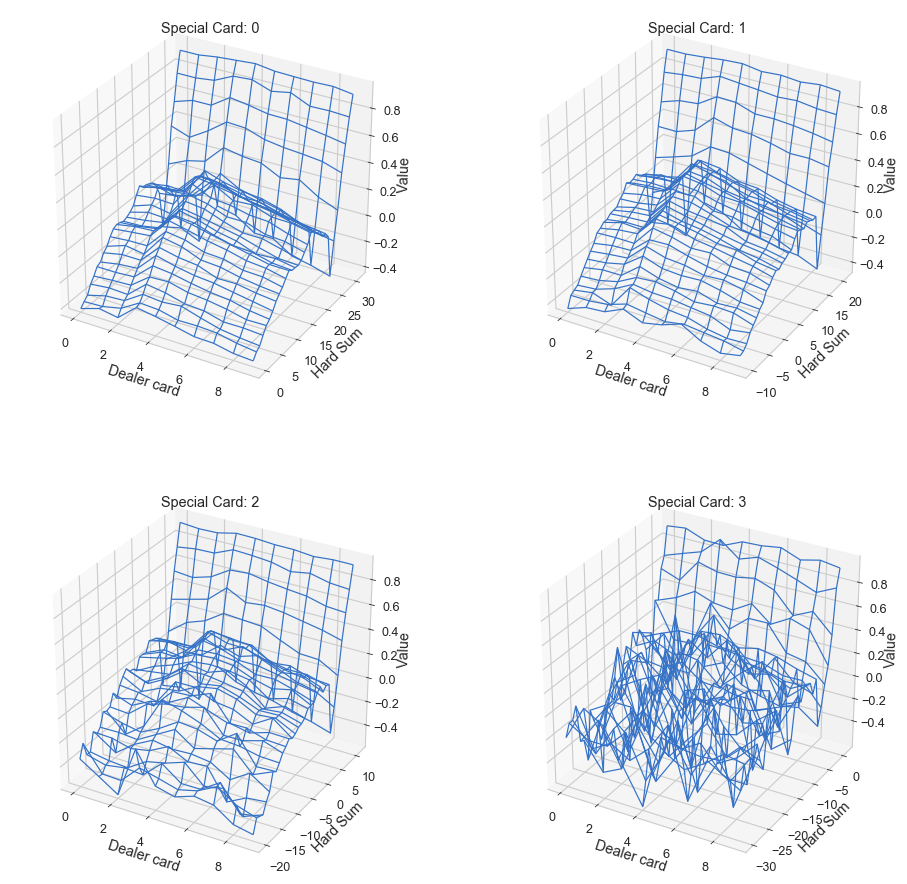

In [7]:
q_dealer = eval_dealer_policy(eval_algo=0,num_expt=10, num_episodes=100000)

## Learning Optimal Policy

### Effect of epsilon decay

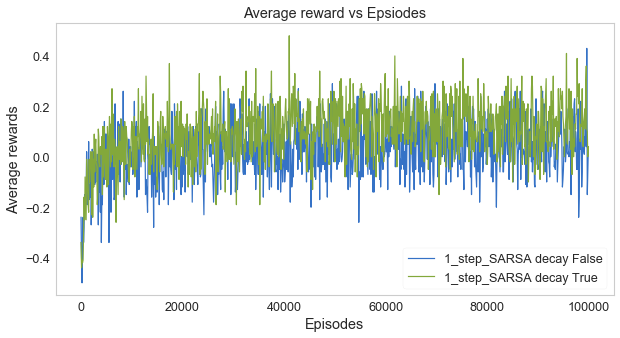

In [8]:
fig = plt.figure(figsize=(10,5))
p1,s1 = k_step_sarsa_offline(number_of_episodes=100000, decay_epsilon=False, plot_frequency=100, test_episodes=100)
p2,s2 = k_step_sarsa_offline(number_of_episodes=100000, decay_epsilon=True, plot_frequency=100, test_episodes=100)
plt.xlabel("Episodes")
plt.ylabel("Average rewards")
plt.legend(loc="best")

### Comparing algorithms

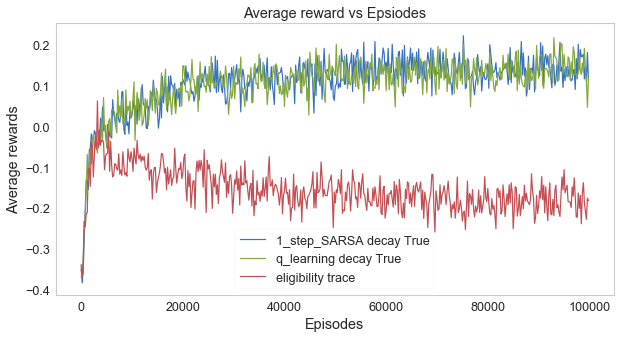

In [9]:
fig = plt.figure(figsize=(10,5))
p1,s1 = k_step_sarsa_offline(number_of_episodes=100000, decay_epsilon=True, plot_frequency=200,k_step=1, test_episodes=1000, lr=0.1)
p2,s2 = q_learning(number_of_episodes=100000, decay_epsilon=True, plot_frequency=200, test_episodes=1000, lr=0.1)
p3,s3 = forward_eligibility_trace(number_of_episodes=100000, decay_epsilon=True, plot_frequency=200, test_episodes=1000, lr=0.1)
plt.xlabel("Episodes")
plt.ylabel("Average rewards")
plt.legend(loc="best")

### Effect of modifying alpha

In [12]:
%%capture
alpha_list=[0.01,0.02,0.05,0.1,0.2,0.3]
sarsa = []
ql = []
et = []
for alpha in alpha_list:
    p1,s1 = k_step_sarsa_offline(number_of_episodes=10000, decay_epsilon=True, plot_frequency=20000,k_step=1, test_episodes=100, lr=alpha)
    sarsa.append(test_policy(p1,10000))
    p1,s1 = q_learning(number_of_episodes=10000, decay_epsilon=True, plot_frequency=20000, test_episodes=100, lr=alpha)
    ql.append(test_policy(p1,10000))
    p1,s1 = forward_eligibility_trace(number_of_episodes=10000, decay_epsilon=True, plot_frequency=20000, test_episodes=100, lr=alpha)
    et.append(test_policy(p1,10000))

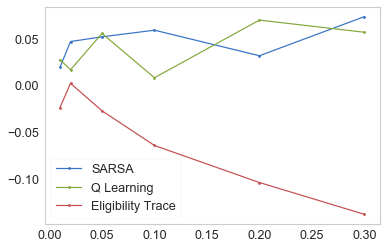

In [13]:
plt.plot(alpha_list,sarsa,".-",label="SARSA")
plt.plot(alpha_list,ql,".-",label="Q Learning")
plt.plot(alpha_list,et,".-",label="Eligibility Trace")
plt.legend()

### Plotting value function for learnt policy

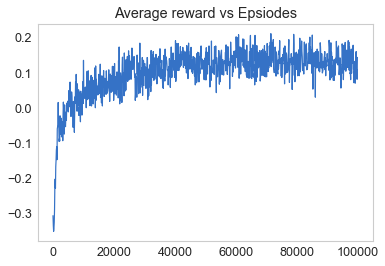

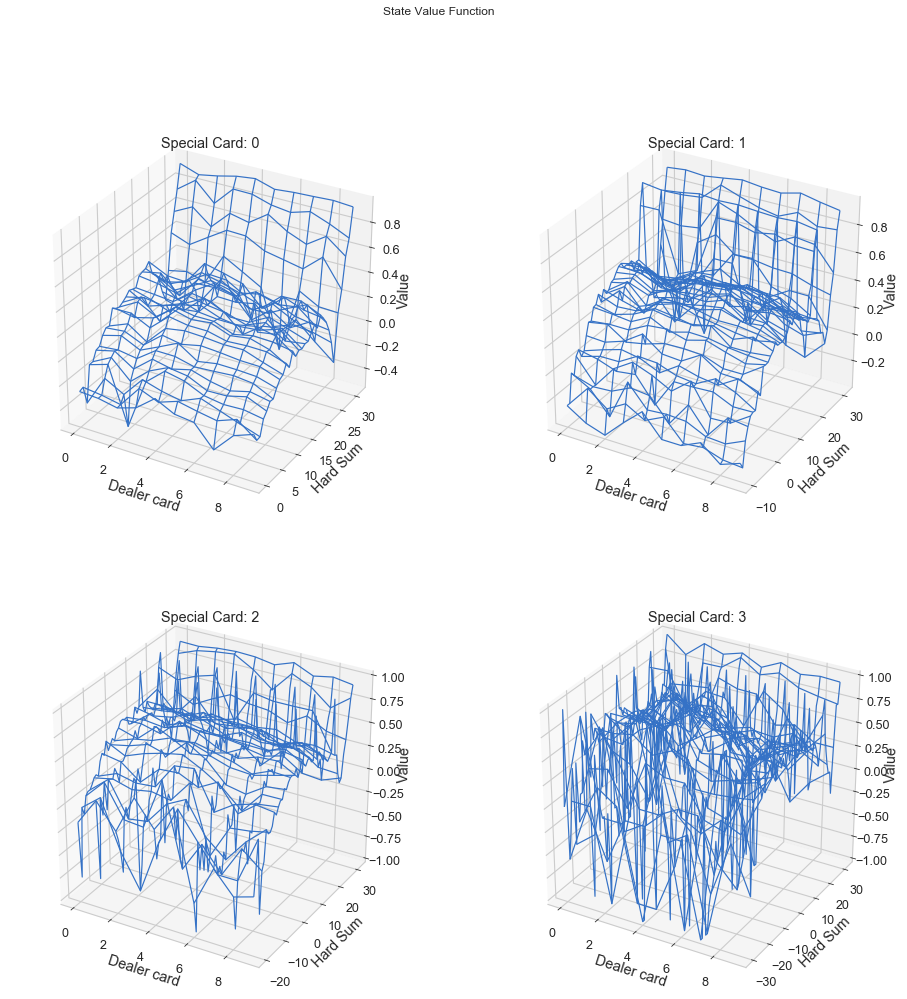

({(1, 0, 0): 1,
  (1, 1, 0): 1,
  (1, 2, 0): 0,
  (1, 3, 0): 1,
  (1, 4, 0): 1,
  (1, 5, 0): 1,
  (1, 6, 0): 1,
  (1, 7, 0): 1,
  (1, 8, 0): 1,
  (1, 9, 0): 1,
  (1, 10, 0): 1,
  (1, 11, 0): 1,
  (1, 12, 0): 1,
  (1, 13, 0): 1,
  (1, 14, 0): 1,
  (1, 15, 0): 1,
  (1, 16, 0): 1,
  (1, 17, 0): 1,
  (1, 18, 0): 1,
  (1, 19, 0): 1,
  (1, 20, 0): 1,
  (1, 21, 0): 1,
  (1, 22, 0): 1,
  (1, 23, 0): 1,
  (1, 24, 0): 1,
  (1, 25, 0): 1,
  (1, 26, 0): 1,
  (1, 27, 0): 0,
  (1, 28, 0): 0,
  (1, 29, 0): 0,
  (1, 30, 0): 0,
  (1, 31, 0): 0,
  (1, -10, 1): 0,
  (1, -9, 1): 1,
  (1, -8, 1): 1,
  (1, -7, 1): 1,
  (1, -6, 1): 1,
  (1, -5, 1): 1,
  (1, -4, 1): 1,
  (1, -3, 1): 1,
  (1, -2, 1): 1,
  (1, -1, 1): 1,
  (1, 0, 1): 1,
  (1, 1, 1): 1,
  (1, 2, 1): 1,
  (1, 3, 1): 1,
  (1, 4, 1): 1,
  (1, 5, 1): 1,
  (1, 6, 1): 1,
  (1, 7, 1): 1,
  (1, 8, 1): 1,
  (1, 9, 1): 1,
  (1, 10, 1): 1,
  (1, 11, 1): 1,
  (1, 12, 1): 1,
  (1, 13, 1): 1,
  (1, 14, 1): 1,
  (1, 15, 1): 1,
  (1, 16, 1): 1,
  (1, 17, 1): 1,

In [14]:
policy, q, scores = learn_policy(algo=1, num_episodes=100000, tes)